In [ ]:
import os, re
import matplotlib.pyplot as plt
import numpy as np

def scatter(dates,freqs,title,color,x_label,y_label):
    xData = list(map(int, dates))
    yData = list(map(int, freqs))
    
    xyCoords=np.c_[xData,yData]
    
    uniquePoints, counts = np.unique(xyCoords, return_counts=True,axis=0)
    plt.scatter(uniquePoints[:,0],uniquePoints[:,1],s=counts*100,c=color,)

    fig = plt.gcf()
    fig.set_size_inches(15, 10)

    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    
    plt.title(title,fontsize=25)
    
    plt.show()

def bar(xData,yData,title,xlabel,ylabel):
    if (xData == "Year"):
        xData = list(map(int, xData))
        yData = list(map(int, yData))
    
    plt.figure(figsize = (15, 10))

    plt.bar(xData,yData,color='purple')
    
    plt.title(title, fontsize=20)
    
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    
    plt.show()

In [ ]:
dir = '/srv/data/ECBC-Data-2022/Text_Files'
f1 = 'eebo_phase1_IDs_and_dates.txt'
f2 = 'EEBO_Phase2_IDs_and_dates.txt' 

def getDates(folder,f,dRanges,unknown,ourTimes):
    file = os.path.join(folder,f)
    data = open(file,'r')
    data = data.readlines()
    dates = {}
    for d in data:
        datum = d.replace('\n','')
        datum = d.split('\t')
        id = datum[0]
        date = datum[1].replace('\n','')
        date = date.replace('?','')
        
        if re.search('-',date):
            # only look at the start date 
            r = date.split('-')
            dRanges[id] = date
            date = r[0] 
            # if re.search('u', r[1]) or r[1].find('?') != -1:
            #     unknown[id] = dRanges[id]
            # continue
      
        if re.search('u', date): #or date.find('?') != -1:
            unknown[id] = date
            if re.search('\d{3}',date):
                estimate = re.findall('\d{3}',date)[0]
                if estimate in range(158,164):
                    date = estimate + '0'
                else:
                    continue
            else:
                continue
        
        value = int(date)
        if value in range(1580,1640+2):
            ourTimes[id] = value  
            if value not in dates.keys():
                dates[value] = []
            else:
                dates[value].append(id)
    
    print("There are " + str(len(ourTimes)) + " texts within 1580-1641 (including the first estimated date in a range), " + 
            str(len(dRanges)) + " texts with date ranges, and", 
            str(len(unknown)) + " texts with unknown dates (marked with a 'u').")
    # print(f"Here are the texts within your range: {ourTimes}")
    # print(f"Here are the texts with a time range: {dRanges}")
    # print(f"These are the texts with unknown dates: {unknown}")
    return dates,unknown,dRanges,ourTimes

def plotFreqs(dList):
    freqs = {}
    for dict in dList: 
        for key in dict.keys():
            if key not in freqs.keys():
                freqs[key] = len(dict[key])
            else: 
                freqs[key] += len(dict[key])
    scatter(freqs.keys(),freqs.values(),"TCP Texts Per Year","purple","Year","Number of TCP Texts")
    bar(freqs.keys(),freqs.values(),"TCP Texts Per Year","Year","Number of TCP Texts")

In [ ]:
print('Phase I')
d1 = getDates(dir,f1,{},{},{})
print('Phase II')
d2 = getDates(dir,f2,{},{},{})

In [ ]:
relevant = open('/srv/data/ECBC-Data-2022/Text_Files/relevant.txt','a+')
info = d1[3]
for k in d2[3].keys():
    info[k] = d2[3][k]
for id in info:
    relevant.write(id+'\n')
relevant.close()

In [ ]:
plotFreqs([d1[0],d2[0]])

In [ ]:
def plotUnknowns(list):
    freqs = {}
    for d in list: 
        for id in d.keys(): 
            start = d[id].split('-')[0]
            if start.find('?') != -1 or re.search('u',start):
                print(start)
                continue
            else:
                if start not in freqs.keys():
                    freqs[start] = 1
                else:
                    freqs[start] += 1 
    print(sorted (freqs.items(), key=lambda kv:(kv[1], kv[0]), reverse=True))
    scatter(freqs.keys(),freqs.values(),"TCP Texts w/ Date Ranges","purple","Earliest Estimated Date","Number of TCP Texts")

plotUnknowns([d1[2],d2[2]])

In [ ]:
def getIDs(list):
    for dict in list:
        names = []
        for key in dict.keys():
            names.append(key)
        return names
print(getIDs([d1[2],d2[2]]))


In [ ]:
output = '/srv/data/dateRangeTextNames.txt'
names = getIDs([d1[2],d2[2]])
file = open(output,'a+')
count = 0
for name in names:
    count += 1
    file.write(name + '\n')
print(count)
file.close()

In [ ]:
d1 = getDates(dir,f1,{},{},{})
d2 = getDates(dir,f2,{},{},{})

epMissingInfo = open('/srv/data/ECBC-Data-2022/Text_Files/EPmissing.txt','r')
epMissingInfo = epMissingInfo.readlines()
names = []
for name in epMissingInfo:
    name = name.replace('\n','')
    names.append(name)
print(len(names))

relevant = d1[3]
for n in d2[3]:
    if n in info.keys(): 
        date = info[n]
        relevant[n] = date
     
print(len(relevant))

In [ ]:
relevantI,relevantII = {},{}
for n in names:
    if n in d1[3].keys(): 
        date = d1[3][n]
        relevantI[n] = date
    elif n in d2[3].keys():
        date = d2[3][n]
        relevantII[n] = date
print(len(relevantI))
print(len(relevantII))
print(len(relevantI)+len(relevantII))

In [ ]:
m = []
for id in relevant:
    if id in names: 
        continue
    else:
        m.append(id)
print(len(m))

In [ ]:
phaseImissing = '/srv/data/ECBC-Data-2022/Text_Files/relevantEPmissingPhaseI.txt'
phaseIImissing = '/srv/data/ECBC-Data-2022/Text_Files/relevantEPmissingPhaseII.txt'
IFile = open(phaseImissing,'a+')
IIFile = open(phaseIImissing,'a+')
for id in relevantI.keys():
    IFile.write(id+' '+str(relevantI[id])+'\n')
IFile.close()
for id in relevantII.keys():
    IIFile.write(id+' '+str(relevantII[id])+'\n')
IIFile.close()

In [ ]:
from metadata import dateTXT
lc = {'B16512', 'A89090', 'A07559', 'A13423', 'A16139', 'B05120', 'A95296', 'A35777', 'A18988', 'A48041', 'B20144', 'A05751', 'A57996', 'A52025', 'A32196', 'A67910', 'A70068', 'A94946', 'A46883', 'A78860', 'A77466', 'A06425', 'A81942', 'A26297', 'A73587', 'A60582', 'A60096', 'A63277', 'A32195', 'A08162', 'A02472', 'A36824', 'A12609', 'A69440', 'A04014', 'A87395', 'A06920', 'A53493', 'A14027', 'A90202', 'A22327', 'A89536', 'A50702', 'A66798', 'A65620', 'A08258', 'A60307', 'A76387', 'A28784', 'B08922', 'A40298', 'A58003', 'A07605', 'A66544', 'A42937', 'A07604', 'A37407', 'A09478', 'A63691', 'A30685', 'A10526', 'A73547', 'A50866', 'A17260', 'A87300', 'A36024', 'A51285', 'A93706', 'A08154', 'A63417', 'A56517', 'B23173', 'A60019', 'A62163', 'B04361', 'A04911', 'A57999', 'A15309', 'A46313', 'A17733', 'A28875', 'A52021', 'A14028', 'A73588', 'A37114', 'B00767', 'A12218', 'A27264', 'B04078', 'A15862', 'A47670', 'A01836', 'A77465', 'A09573', 'A75487', 'A06778', 'A61934', 'A57997', 'A18694', 'A45955', 'A32740', 'A08166', 'B06274', 'A16125', 'A47555', 'A82459', 'B27386', 'A56484', 'A07915', 'A27013', 'A01839', 'A18686', 'A55667', 'A10314', 'A08239', 'B02743', 'A63439', 'A79207', 'A87578', 'A77430', 'A65565', 'A54958', 'A03734', 'A54349', 'B26438', 'A01618', 'A88889', 'A42320', 'A91882', 'A11027', 'A13128', 'A28427', 'A19712', 'A15796', 'A00985', 'A14026', 'A32751', 'A33410', 'A14397', 'B15734', 'A63414'}
d = []
dates = dateTXT()
for name in lc: 
    date = re.findall('\d{4}',dates[name])[0]
    d.append(int(date))

freqs = {}
for date in d:
    if date not in freqs.keys():
        freqs[date] = 1
    else:
        freqs[date] += 1
bar(freqs.keys(),freqs.values(),'keywordsTCP_Levant','Year','Number of TCP Texts')

In [ ]:
import csv,re
import pandas as pd
folder = '/srv/data/metadata/TCP metadata/'
output = '/srv/data/metadata/tuning/decade.csv'
outfile = open(output,'a+')
columns = ['id', 'stc', 'estc','title','author','publisher','pubplace','keywords','date']
writer = csv.DictWriter(outfile, fieldnames=columns)
writer.writeheader()
for file in os.listdir(folder):
    csvFile = os.path.join(folder,file)
    with open(csvFile) as readFile:
        heading = next(readFile)
        reader = csv.reader(readFile)
        for row in reader:
            date = re.findall('\d{4}',row[-1])
            if len(date) != 0:
                d = date[0]
                if int(d) in range(1600,1610+1):
                    dict = {'id':row[0],'stc':row[1],'estc':row[2],'title':row[3],
                            'author':row[4],'publisher':row[5],'pubplace':row[6],
                            'keywords':row[7],'date':row[8]}
                    writer.writerow(dict)
outfile.close()

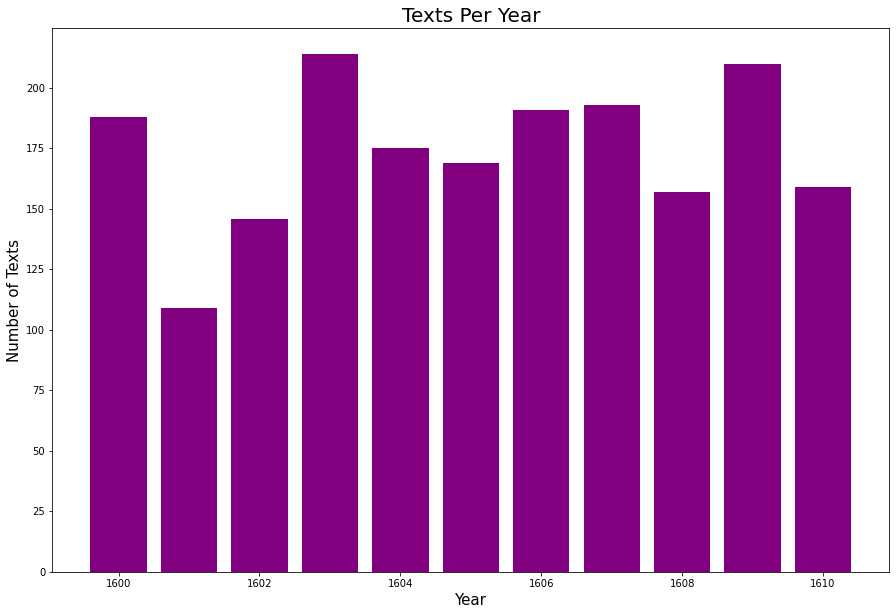

In [29]:
decadeFile = pd.read_csv(output)
freqs = {}
decadeDates = decadeFile['date']
decadeIDs = decadeFile['id']
for index,ID in enumerate(decadeIDs):
    date = decadeDates[index]
    if '-' in date:
        d = date.split('-')
        date = d[0]
    if int(date) not in freqs.keys():
        freqs[int(date)] = 1
    else:
        freqs[int(date)] += 1 
bar(freqs.keys(),freqs.values(),'Texts Per Year','Year','Number of Texts')
